# PROGRAM 1

In [2]:
# import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data
# X_train = X_train.reshape(X_train.shape[0], -1)
# X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten and normalize the data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

# Predict
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)


KNN Accuracy: 0.3398


In [8]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Neural Network Test Accuracy:', test_acc)


Epoch 1/2
391/391 [==============================] - 7s 16ms/step - loss: 1.9777 - accuracy: 0.2784 - val_loss: 1.7871 - val_accuracy: 0.3686
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 1.6975 - accuracy: 0.3976
Neural Network Test Accuracy: 0.397599995136261


# PROGRAM 2 

In [9]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# Define data transformations for preprocessing
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load a pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # Replace the final fully connected layer for binary classification

# Load an image to classify
image_path = 'D:/Study/7th sem/DL/cat_dog.jpg'
image = Image.open(image_path)
image = data_transform(image)
image = image.unsqueeze(0)  # Add batch dimension

# Save the model state dictionary to a file
# torch.save(model.state_dict(), 'resnet50_pretrained_weights.pth')

# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    outputs = model(image)
    _, predicted = torch.max(outputs, 1)

# Map class indices to class labels
class_labels = ['cat', 'dog']
predicted_class = class_labels[predicted.item()]

print(f'The image is classified as: {predicted_class}')


e:\Anaconda\envs\isro\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


The image is classified as: cat


# PROGRAM 3

In [10]:
import tensorflow as tf 
from tensorflow import keras 
# Load the CIFAR-10 dataset 
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() 
# Preprocess the data 
x_train = x_train.astype("float32") / 255.0 
x_test = x_test.astype("float32") / 255.0 
# Define a simple CNN model 
model = keras.Sequential([ 
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)), 
    keras.layers.MaxPooling2D((2, 2)), 
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation="relu"), 
    keras.layers.Dense(10, activation="softmax") 
]) 
# Compile the model 
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"]) 
# Train the model 
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2) 
# Evaluate the model on the test set 
test_loss, test_accuracy = model.evaluate(x_test, y_test) 
print(f"Test accuracy: {test_accuracy * 100:.2f}%") 

Epoch 1/10
286/625 [============>.................] - ETA: 4s - loss: 1.7081 - accuracy: 0.3856

KeyboardInterrupt: 

# PROGRAM 4



In [1]:
import tensorflow as tf 
from tensorflow import keras 
# Load the CIFAR-10 dataset 
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() 
# Preprocess the data 
x_train = x_train.astype("float32") / 255.0 
x_test = x_test.astype("float32") / 255.0 
# Data Augmentation 
datagen = keras.preprocessing.image.ImageDataGenerator( 
    rotation_range=15, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True 
) 
datagen.fit(x_train) 
# Define a deeper CNN model 
model = keras.Sequential([ 
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)), 
    keras.layers.BatchNormalization(), 
    keras.layers.Conv2D(64, (3, 3), activation="relu"), 
    keras.layers.MaxPooling2D((2, 2)), 
    keras.layers.BatchNormalization(), 
    keras.layers.Conv2D(128, (3, 3), activation="relu"), 
    keras.layers.GlobalAveragePooling2D(), 
    keras.layers.Dense(128, activation="relu"), 
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(10, activation="softmax") 
                                                      
                                                      
 
]) 
# Compile the model 
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"]) 
# Train the model with data augmentation 
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=1, validation_data=(x_test, y_test)) 
# Evaluate the model on the test set 
test_loss, test_accuracy = model.evaluate(x_test, y_test) 
print(f"Test accuracy: {test_accuracy * 100:.2f}%") 

313/313 [==============================] - 3s 11ms/step - loss: 1.4877 - accuracy: 0.1003
Test accuracy: 10.03%


# PROGRAM 6

In [3]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing.sequence import pad_sequences

# Load the IMDb dataset
vocabulary_size = 5000
max_words = 500
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)

# Preprocess the data
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)

# Define the model
embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
num_epochs = 1
model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.1)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])


17464789/17464789 [==============================] - 2s 0us/step



352/352 [==============================] - 35s 91ms/step - loss: 0.6478 - accuracy: 0.6044 - val_loss: 0.6083 - val_accuracy: 0.6596
Test accuracy: 0.6601600050926208


# PROGRAM 5

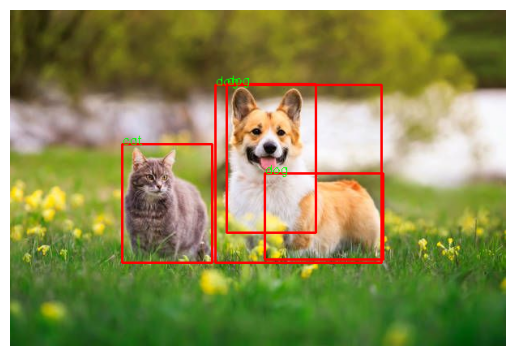

In [7]:
import torch
import torchvision.transforms as T
import torchvision
import cv2
import matplotlib.pyplot as plt

# Load pre-trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and transform the test image
test_image_path = 'D:/Study/7th sem/DL/cat_dog.jpg'
transform = T.Compose([T.ToTensor()])
test_image = cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB)
test_image_tensor = transform(test_image)

# Make predictions on the test image
with torch.no_grad():
    predictions = model([test_image_tensor])

# Visualize detection results for cats and dogs
for box, label in zip(predictions[0]['boxes'], predictions[0]['labels']):
    if label in [17, 18]:  # Cat and Dog labels
        x1, y1, x2, y2 = map(int, box)
        label_name = ['cat', 'dog'][label - 17]
        cv2.rectangle(test_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(test_image, label_name, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Display the annotated image
plt.imshow(test_image)
plt.axis('off')
plt.show()
